# SPOTIFY: Popularity Prediction (Regression)

**PROBLEM STATEMENT :** We have with us the Library data from spotify for 114000 Music Tracks recored in 21 variables. Based on these features we have to build a regression model that can predict the Popularity of a Track. Find out the most important features used by the optimal model for predicting the popularity of a track.


These are the features we have: 

* **track_id:** The Spotify ID for the track
* **artists:** The artists' names who performed the track.
* **album_name:** The album name in which the track appears
* **track_name:** Name of the track
* **popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. 
* **duration_ms:** The track length in milliseconds
* **explicit:** Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
* **danceability:** Describes how suitable a track is for dancing A value between 0.0 and 1.0.
* **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
* **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
* **loudness:** The overall loudness of a track in decibels (dB)
* **mode:** Indicates the modality (major or minor) of a track. Major is represented by 1 and minor is 0
* **speechiness:** Speechiness detects the presence of spoken words in a track. Value Between 0 and 1.
* **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
* **instrumentalness:** Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
* **liveness:** Detects the presence of an audience in the recording. A value between 0.0 and 1.0.
* **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
* **tempo:** The overall estimated tempo of a track in beats per minute (BPM). 
* **time_signature:** A notational convention to specify how many beats are in each bar (or measure).
* **track_genre:** The genre in which the track belongs

## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Spotify.csv')
df.shape

(114000, 21)

In [3]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [5]:
df.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [6]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

## UNIVARIATE ANALYSIS

**1. Track ID**

In [7]:
df['track_id'].nunique()

89741

In [8]:
duplicated = df[df['track_id'].duplicated(keep = False)]
print(duplicated.shape)
duplicated.groupby('track_id')['track_id'].count()

(40900, 20)


track_id
001APMDOl3qtx1526T11n1    2
001YQlnDSduXd5LgBd66gT    2
003vvx7Niy0yvhvHt4a68B    3
004h8smbIoAkUNDJvVKwkG    2
006rHBBNLJMpQs8fRC2GDe    3
                         ..
7ztSVy67w9rXpKg5L2zN5l    2
7zubR9uYAWjb5KPZTMm85e    4
7zumacGldlmxpoP8bpaeLe    2
7zv2vmZq8OjS54BxFzI2wM    2
7zwn1eykZtZ5LODrf7c0tS    3
Name: track_id, Length: 16641, dtype: int64

The dataframe has 114000 rows and we have only 89741 unique **track_ids**, which means there are close to 24259 duplicate values in the dataset. Upon investigating further we found there were 16642 different songs occuring multiple times. We need to remove them and clean the data for further analysis.

In [9]:
df = df[df['track_id'].duplicated(keep = 'first') == False]
df.shape

(89741, 20)

**2. Artists**

In [10]:
df['artists'].nunique()

31437

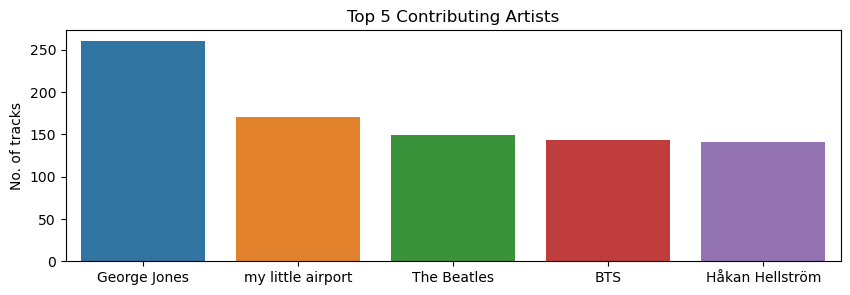

In [11]:
plt.figure(figsize = (10,3), dpi = 100)
sns.barplot(x = df['artists'].value_counts()[0:5].index, y = df['artists'].value_counts()[0:5].values)
plt.title('Top 5 Contributing Artists')
plt.ylabel('No. of tracks')
plt.show()

**3. Album Name**

In [12]:
df['album_name'].value_counts()

The Complete Hank Williams     110
Greatest Hits                   77
Mozart: A Night of Classics     75
Alternative Christmas 2022      73
Mozart - All Day Classics       68
                              ... 
Funk Ostentação                  1
Zika Sai Pra Lá                  1
Se Eu Te Botar Faz Barulho?      1
Freestyle pra Faixa Rosa         1
Revelation Songs                 1
Name: album_name, Length: 46589, dtype: int64

**4. Popularity**

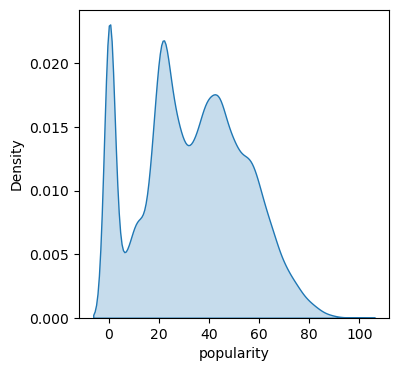

In [13]:
plt.figure(figsize = (4,4), dpi = 100)
sns.kdeplot(df['popularity'], fill = True)
plt.show()

The maximum portion of Spotify's library is filled with the songs whose popularity ranges from 0 to 45.

**5. Duration**

The song duration given here is in Milliseconds, we'll convert it to Seconds

In [14]:
df['duration'] = df['duration_ms']/1000
df.drop('duration_ms', axis = 1, inplace = True)

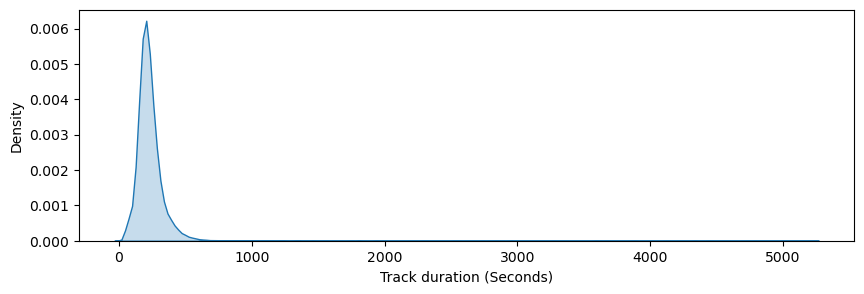

In [15]:
plt.figure(figsize = (10,3), dpi = 100)
sns.kdeplot(df['duration'], fill = True)
plt.xlabel('Track duration (Seconds)')
plt.show()

**6. Explicit**

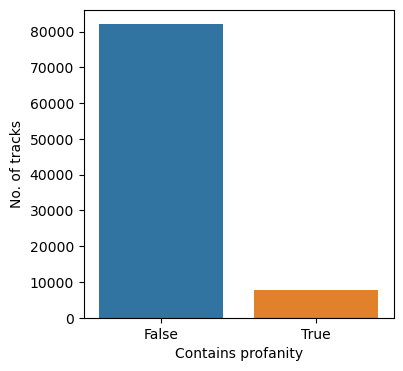

In [16]:
plt.figure(figsize = (4,4), dpi = 100)
sns.barplot(x = df['explicit'].value_counts().index, y = df['explicit'].value_counts().values)
plt.xlabel('Contains profanity')
plt.ylabel('No. of tracks')
plt.show()

**7. Danceability**

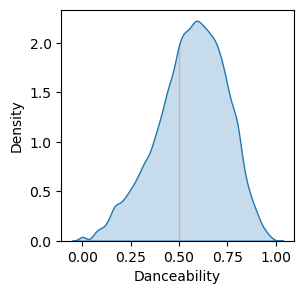

In [17]:
plt.figure(figsize = (3,3), dpi = 100)
sns.kdeplot(df['danceability'], fill = True)
sns.lineplot(x = (0.5 for i in range(0,3)), y = range(0,3), color = 'Red')
plt.xlabel('Danceability')
plt.show()

**8. Energy**

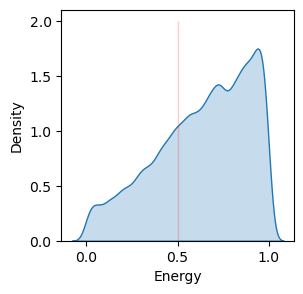

In [18]:
plt.figure(figsize = (3,3), dpi = 100)
sns.kdeplot(df['energy'], fill = True)
sns.lineplot(x = (0.5 for i in range(0,3)), y = range(0,3), color = 'Red')
plt.xlabel('Energy')
plt.show()

**9. Key**

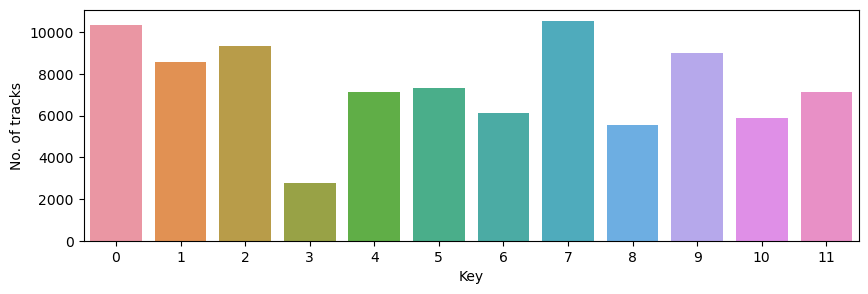

In [19]:
plt.figure(figsize = (10,3), dpi = 100)
sns.barplot(x = df['key'].value_counts().index, y = df['key'].value_counts().values)
plt.xlabel('Key')
plt.ylabel('No. of tracks')
plt.show()

**10. Loudness**

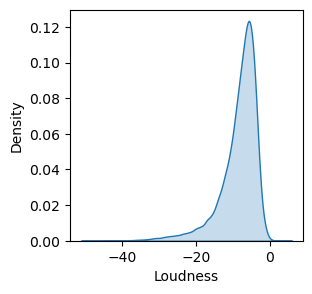

In [20]:
plt.figure(figsize = (3,3), dpi = 100)
sns.kdeplot(df['loudness'], fill = True)
plt.xlabel('Loudness')
plt.show()

**11. Mode**

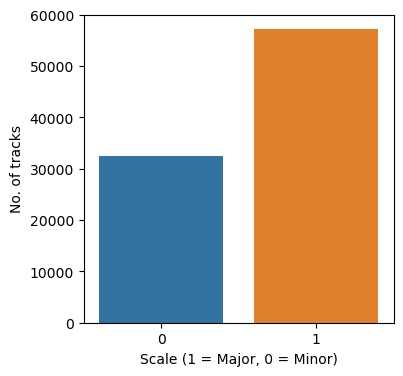

In [21]:
plt.figure(figsize = (4,4), dpi = 100)
sns.barplot(x = df['mode'].value_counts().index, y = df['mode'].value_counts().values)
plt.xlabel('Scale (1 = Major, 0 = Minor)')
plt.ylabel('No. of tracks')
plt.show()

**12. Speechiness**

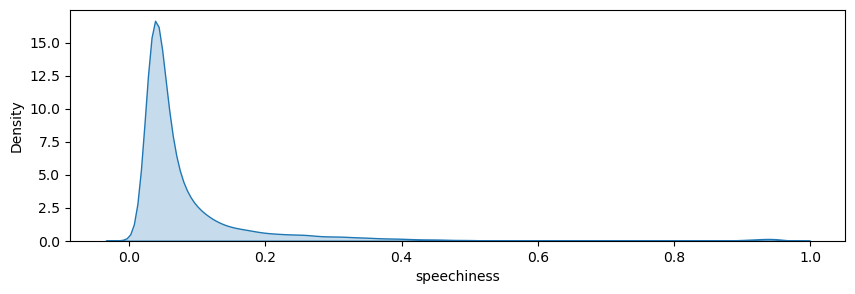

In [22]:
plt.figure(figsize = (10,3), dpi = 100)
sns.kdeplot(df['speechiness'], fill = True)
plt.xlabel('speechiness')
plt.show()

Almost the complete population of tracks available in the Spotify library fall below 0.33 Speechiness, which means they contain very less vocals.


**13. Acousticness**

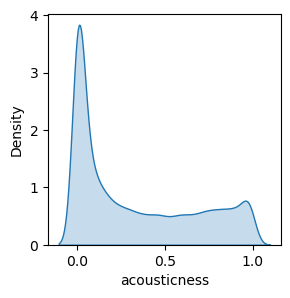

In [23]:
plt.figure(figsize = (3,3), dpi = 100)
sns.kdeplot(df['acousticness'], fill = True)
plt.xlabel('acousticness')
plt.show()

Most of the tracks in the library are Electronically amplified and processed digitally.

In [24]:
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'duration'],
      dtype='object')

**14. Instrumentalness**

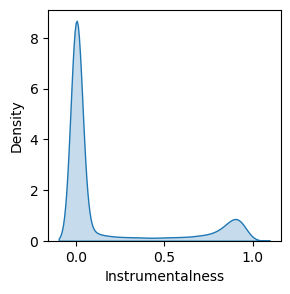

In [25]:
plt.figure(figsize = (3,3), dpi = 100)
sns.kdeplot(df['instrumentalness'], fill = True)
plt.xlabel('Instrumentalness')
plt.show()

**15. Liveness**

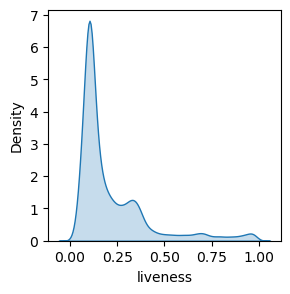

In [26]:
plt.figure(figsize = (3,3), dpi = 100)
sns.kdeplot(df['liveness'], fill = True)
plt.xlabel('liveness')
plt.show()

**16. Valence**

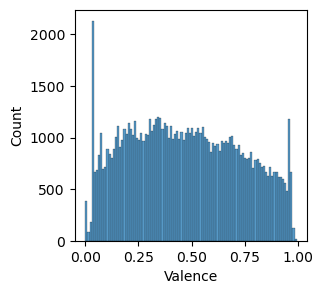

In [27]:
plt.figure(figsize = (3,3), dpi = 100)
sns.histplot(df['valence'], bins = 100)
plt.xlabel('Valence')
plt.show()

**17. Tempo**

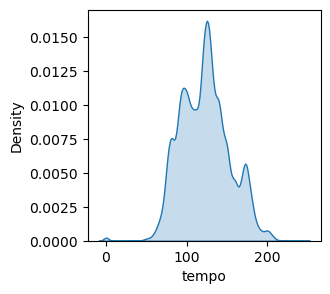

In [28]:
plt.figure(figsize = (3,3), dpi = 100)
sns.kdeplot(df['tempo'], fill = True)
plt.xlabel('tempo')
plt.show()

**18. Time Signature**

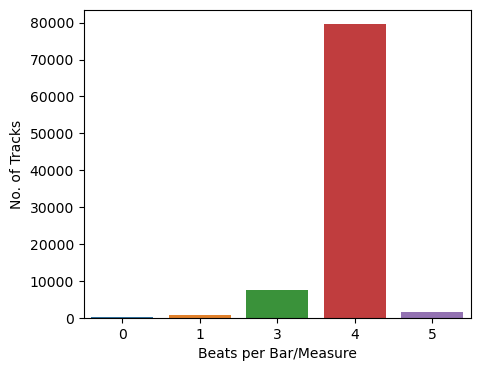

In [29]:
plt.figure(figsize = (5,4), dpi = 100)
sns.barplot(x = df['time_signature'].value_counts().index, y = df['time_signature'].value_counts().values)
plt.xlabel('Beats per Bar/Measure')
plt.ylabel('No. of Tracks')
plt.show()

Almost all the songs follow a 4 beats-per-bar meter

**19. Track Genre**

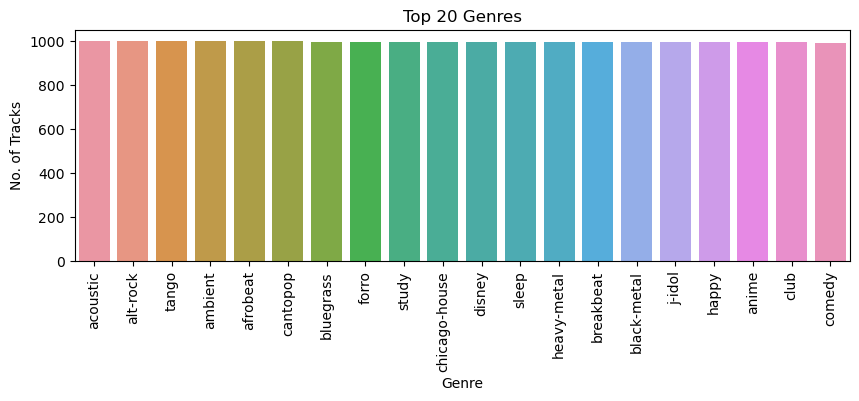

In [30]:
plt.figure(figsize = (10,3), dpi = 100)
sns.barplot(x = df['track_genre'].value_counts()[0:20].index, y = df['track_genre'].value_counts()[0:20].values)
plt.xlabel('Genre')
plt.ylabel('No. of Tracks')
plt.xticks(rotation = 90)
plt.title('Top 20 Genres')
plt.show()

## Bi-VARIATE ANALYSIS

**1. Artists V/S Popularity**

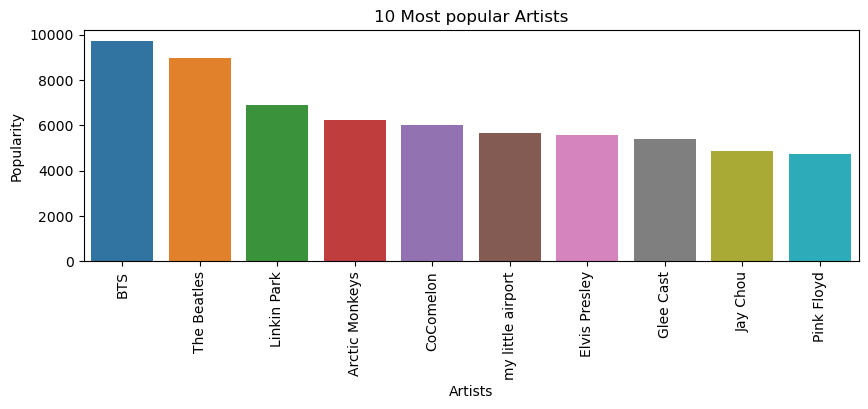

In [31]:
grouped = df.groupby('artists')['popularity'].sum()

plt.figure(figsize = (10,3), dpi = 100)
sns.barplot(x = grouped.sort_values(ascending = False)[0:10].index, y = grouped.sort_values(ascending = False)[0:10].values)
plt.xlabel('Artists')
plt.ylabel('Popularity')
plt.xticks(rotation = 90)
plt.title('10 Most popular Artists')
plt.show()

From the bar-chart we can see that Top-5 most popular artists on Spotify are BTS, The Beatles, Linkin Park, Arctic Monkeys ans Cocomelon. The fact that **BTS has surpassed the popularity of The Beatles** and CoComelon, that of Elvis Presley and Pink Floyd, breaks my heart. 

**2. Album V/S Popularity**

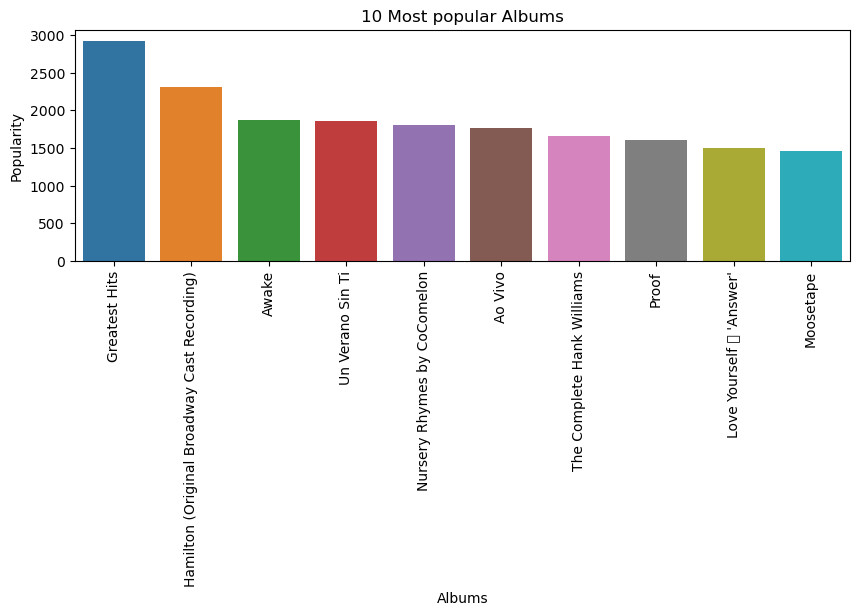

In [32]:
grouped = df.groupby('album_name')['popularity'].sum()

plt.figure(figsize = (10,3), dpi = 100)
sns.barplot(x = grouped.sort_values(ascending = False)[0:10].index, y = grouped.sort_values(ascending = False)[0:10].values)
plt.xlabel('Albums')
plt.ylabel('Popularity')
plt.xticks(rotation = 90)
plt.title('10 Most popular Albums')
plt.show()

**3. Track Name V/S Popularity**

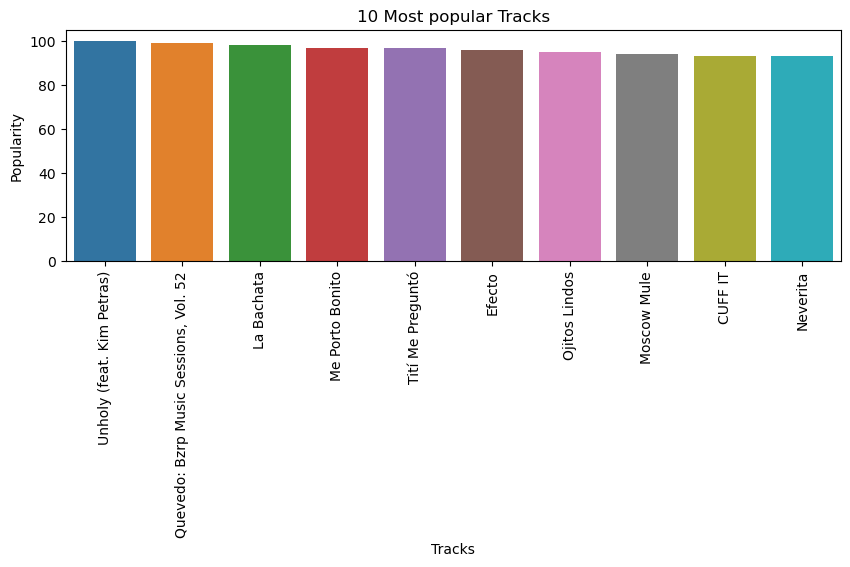

In [33]:
grouped = df.groupby('track_name')['popularity'].mean()

plt.figure(figsize = (10,3), dpi = 100)
sns.barplot(x = grouped.sort_values(ascending = False)[0:10].index, y = grouped.sort_values(ascending = False)[0:10].values)
plt.xlabel('Tracks')
plt.ylabel('Popularity')
plt.xticks(rotation = 90)
plt.title('10 Most popular Tracks')
plt.show()

In [34]:
df.sort_values(by = 'popularity', ascending = False)[['track_name', 'artists', 'popularity']].head(10)

,track_name,artists,popularity
20001,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,100
51664,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,99
67356,La Bachata,Manuel Turizo,98
20008,I'm Good (Blue),David Guetta;Bebe Rexha,98
67358,Me Porto Bonito,Bad Bunny;Chencho Corleone,97
67359,Tití Me Preguntó,Bad Bunny,97
67559,Efecto,Bad Bunny,96
79000,I Ain't Worried,OneRepublic,96
20000,Under The Influence,Chris Brown,96
67500,Ojitos Lindos,Bad Bunny;Bomba Estéreo,95


**4. Explicit V/S Popularity**

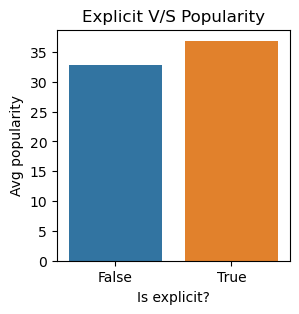

In [35]:
plt.figure(figsize = (3,3), dpi = 100)
sns.barplot(x = df.groupby('explicit')['popularity'].mean().index, y = df.groupby('explicit')['popularity'].mean().values)
plt.xlabel('Is explicit?')
plt.ylabel('Avg popularity')
plt.title('Explicit V/S Popularity')
plt.show()

**5. Danceability V/S Popularity**

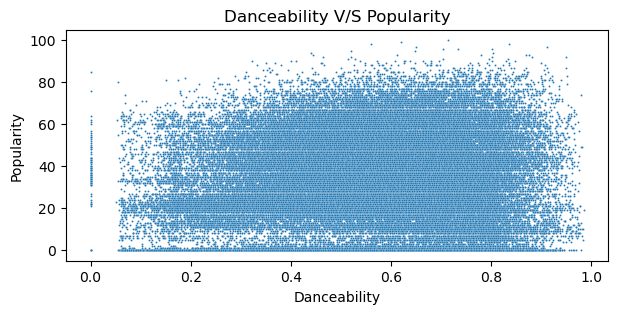

In [36]:
plt.figure(figsize = (7,3), dpi = 100)
sns.scatterplot(y = df['popularity'], x = df['danceability'], s = 2)
plt.ylabel('Popularity')
plt.xlabel('Danceability')
plt.title('Danceability V/S Popularity')
plt.show()

**6. Energy V/S Popularity**

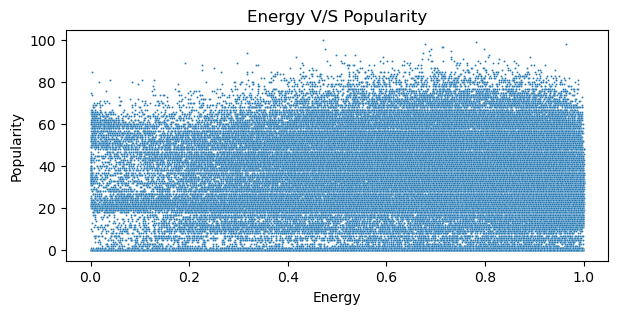

In [37]:
plt.figure(figsize = (7,3), dpi = 100)
sns.scatterplot(y = df['popularity'], x = df['energy'], s = 2)
plt.ylabel('Popularity')
plt.xlabel('Energy')
plt.title('Energy V/S Popularity')
plt.show()

**7. Loudness V/S Popularity**

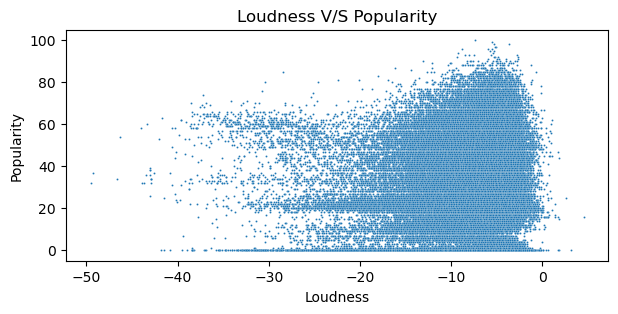

In [38]:
plt.figure(figsize = (7,3), dpi = 100)
sns.scatterplot(y = df['popularity'], x = df['loudness'], s = 2)
plt.ylabel('Popularity')
plt.xlabel('Loudness')
plt.title('Loudness V/S Popularity')
plt.show()

**8. Speechiness V/S Popularity**

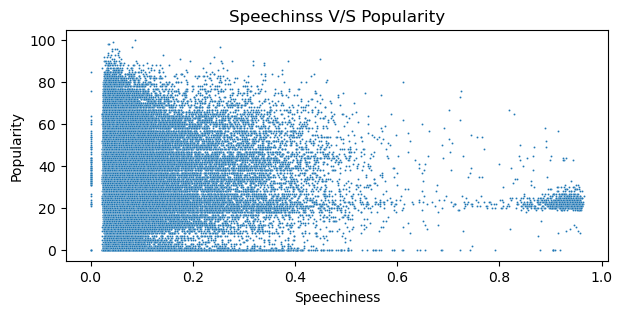

In [39]:
plt.figure(figsize = (7,3), dpi = 100)
sns.scatterplot(y = df['popularity'], x = df['speechiness'], s = 2)
plt.ylabel('Popularity')
plt.xlabel('Speechiness')
plt.title('Speechinss V/S Popularity')
plt.show()

**9. Acousticness V/S Popularity**

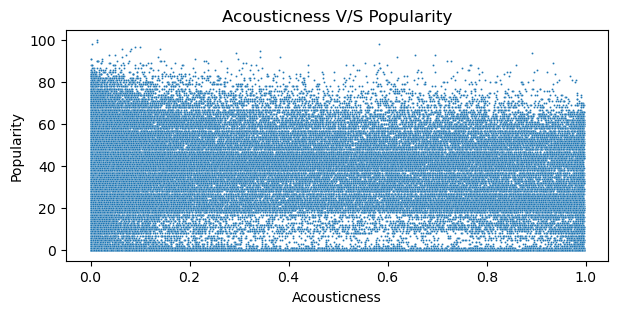

In [40]:
plt.figure(figsize = (7,3), dpi = 100)
sns.scatterplot(y = df['popularity'], x = df['acousticness'], s = 2)
plt.ylabel('Popularity')
plt.xlabel('Acousticness')
plt.title('Acousticness V/S Popularity')
plt.show()

**10. Instrumentalness V/S Popularity**

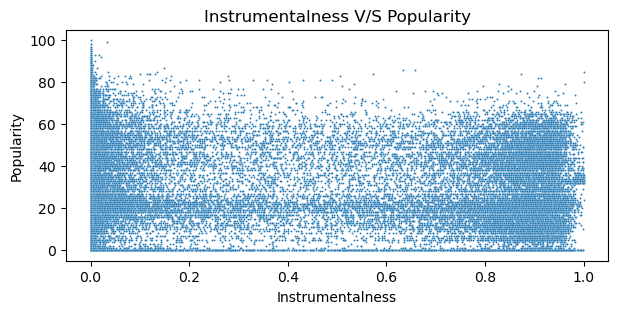

In [41]:
plt.figure(figsize = (7,3), dpi = 100)
sns.scatterplot(y = df['popularity'], x = df['instrumentalness'], s = 2)
plt.ylabel('Popularity')
plt.xlabel('Instrumentalness')
plt.title('Instrumentalness V/S Popularity')
plt.show()

**11. Liveness V/S Popularity**

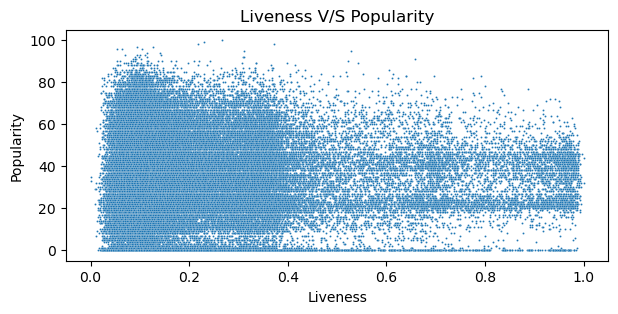

In [42]:
plt.figure(figsize = (7,3), dpi = 100)
sns.scatterplot(y = df['popularity'], x = df['liveness'], s = 2)
plt.ylabel('Popularity')
plt.xlabel('Liveness')
plt.title('Liveness V/S Popularity')
plt.show()

**12. Valence V/S Popularity**

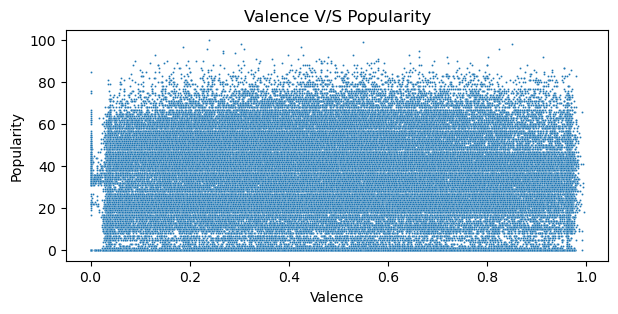

In [43]:
plt.figure(figsize = (7,3), dpi = 100)
sns.scatterplot(y = df['popularity'], x = df['valence'], s = 2)
plt.ylabel('Popularity')
plt.xlabel('Valence')
plt.title('Valence V/S Popularity')
plt.show()

**13. Duration V/S Popularity**

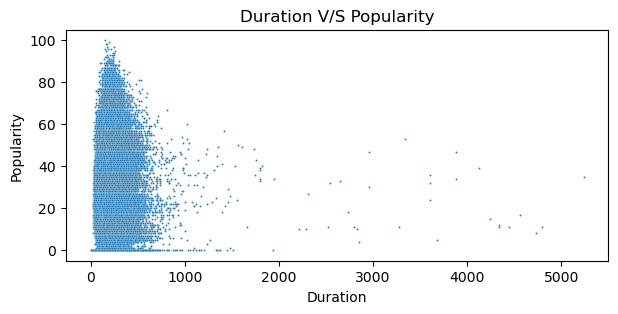

In [44]:
plt.figure(figsize = (7,3), dpi = 100)
sns.scatterplot(y = df['popularity'], x = df['duration'], s = 2)
plt.ylabel('Popularity')
plt.xlabel('Duration')
plt.title('Duration V/S Popularity')
plt.show()

**14. Keys V/S Popularity**

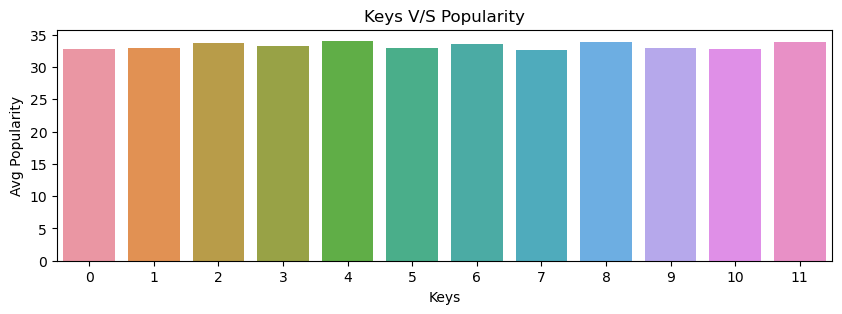

In [45]:
plt.figure(figsize = (10,3), dpi = 100)
sns.barplot(x = df.groupby('key')['popularity'].mean().index, y = df.groupby('key')['popularity'].mean().values)
plt.xlabel('Keys')
plt.ylabel('Avg Popularity')
plt.title('Keys V/S Popularity')
plt.show()

**15. Scale V/S Popularity**

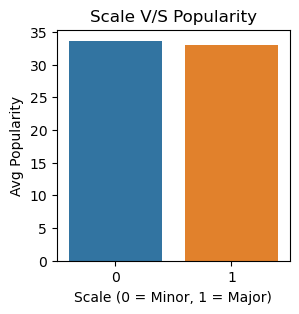

In [46]:
plt.figure(figsize = (3,3), dpi = 100)
sns.barplot(x = df.groupby('mode')['popularity'].mean().index, y = df.groupby('mode')['popularity'].mean().values)
plt.xlabel('Scale (0 = Minor, 1 = Major)')
plt.ylabel('Avg Popularity')
plt.title('Scale V/S Popularity')
plt.show()

**16. Tempo V/S popularity**

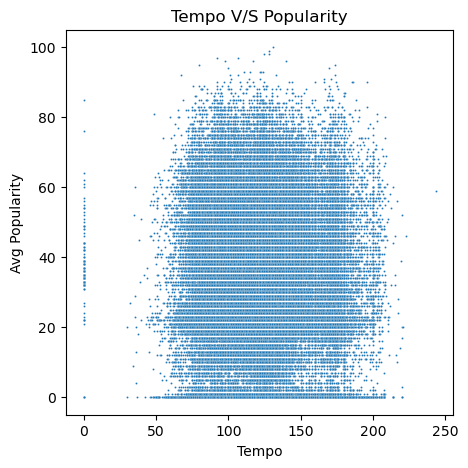

In [47]:
plt.figure(figsize = (5,5), dpi = 100)
sns.scatterplot(x = df['tempo'], y = df['popularity'], s= 2)
plt.xlabel('Tempo')
plt.ylabel('Avg Popularity')
plt.title('Tempo V/S Popularity')
plt.show()

**17. Time Signature V/S Popularity**

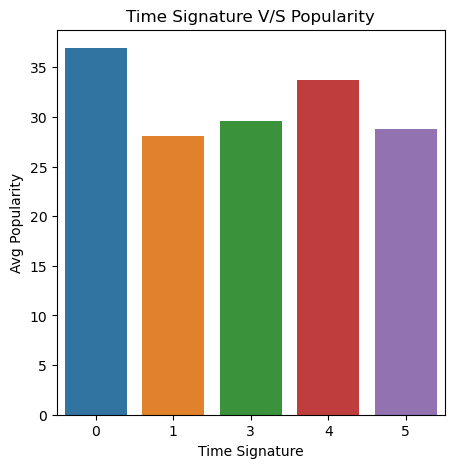

In [48]:
plt.figure(figsize = (5,5), dpi = 100)
sns.barplot(x = df.groupby('time_signature')['popularity'].mean().index, y = df.groupby('time_signature')['popularity'].mean().values)
plt.xlabel('Time Signature')
plt.ylabel('Avg Popularity')
plt.title('Time Signature V/S Popularity')
plt.show()

**18. Track Genre V/S Popularity**

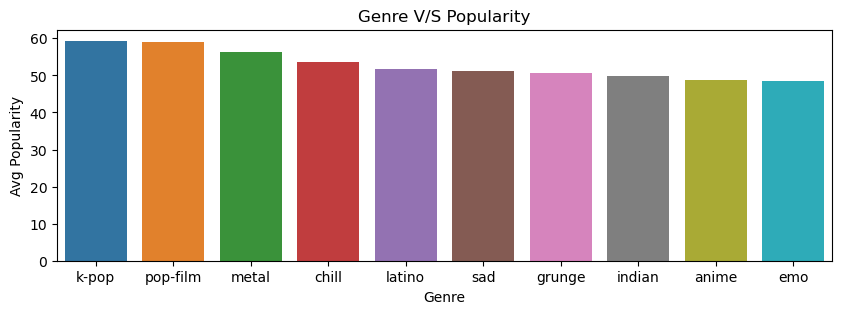

In [49]:
genre_df = df.groupby('track_genre')['popularity'].mean()

plt.figure(figsize = (10,3), dpi = 100)
sns.barplot(x = genre_df.sort_values(ascending = False)[0:10].index, y = genre_df.sort_values(ascending = False)[0:10].values)
plt.xlabel('Genre')
plt.ylabel('Avg Popularity')
plt.title('Genre V/S Popularity')
plt.show()

**19. Correlation Matrix**

In [50]:
df.corr()

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
popularity,1.000000,0.054902,0.064281,0.013728,0.003432,0.071676,-0.016214,-0.047081,-0.038847,-0.127465,-0.013844,-0.011526,0.007270,0.036893,-0.023119
explicit,0.054902,1.000000,0.119116,0.100696,0.006632,0.109049,-0.033848,0.328201,-0.091511,-0.112075,0.041332,-0.002713,-0.004072,0.037127,-0.065365
danceability,0.064281,0.119116,1.000000,0.143914,0.035114,0.271839,-0.062633,0.109520,-0.177043,-0.194747,-0.132234,0.492571,-0.021331,0.210041,-0.064130
energy,0.013728,0.100696,0.143914,1.000000,0.046334,0.758774,-0.075014,0.141332,-0.732566,-0.181037,0.188941,0.256313,0.258628,0.186534,0.063261
key,0.003432,0.006632,0.035114,0.046334,1.000000,0.035902,-0.142096,0.017759,-0.045159,-0.005284,-0.002584,0.026258,0.008275,0.014801,0.011286
loudness,0.071676,0.109049,0.271839,0.758774,0.035902,1.000000,-0.037108,0.055295,-0.582663,-0.434717,0.077239,0.289091,0.228659,0.193695,0.000364
mode,-0.016214,-0.033848,-0.062633,-0.075014,-0.142096,-0.037108,1.000000,-0.040798,0.091020,-0.052580,0.016777,0.025568,-0.001903,-0.023903,-0.039347
speechiness,-0.047081,0.328201,0.109520,0.141332,0.017759,0.055295,-0.040798,1.000000,0.005121,-0.099658,0.225102,0.032932,0.004032,-0.006198,-0.060744
acousticness,-0.038847,-0.091511,-0.177043,-0.732566,-0.045159,-0.582663,0.091020,0.005121,1.000000,0.096065,-0.019081,-0.103767,-0.220244,-0.174054,-0.108499
instrumentalness,-0.127465,-0.112075,-0.194747,-0.181037,-0.005284,-0.434717,-0.052580,-0.099658,0.096065,1.000000,-0.087152,-0.330759,-0.056888,-0.082237,0.117381


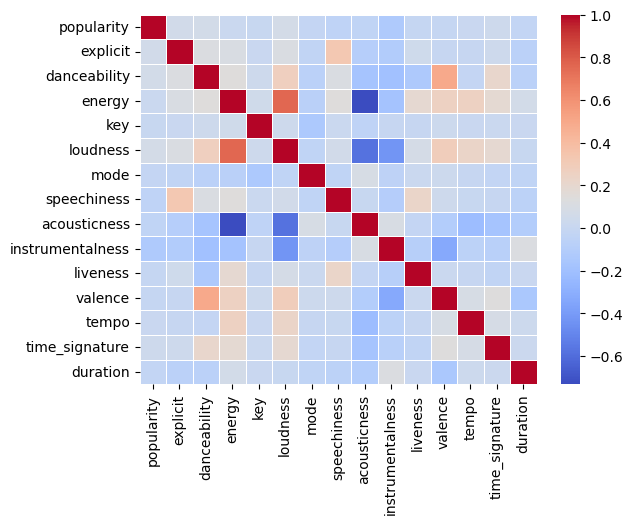

In [51]:
sns.heatmap(df.corr(), linewidths = 0.5, cmap='coolwarm')
plt.show()

## MODELING
### Pre-Processing
#### 1. Missing Value Treatment

In [52]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
duration            0
dtype: int64

In [53]:
df.dropna(inplace = True)

**2. Scaling Numerical Columns**

In [54]:
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'duration'],
      dtype='object')

We will **Scale all the numerical valriables separately** and then concatenate the scaled values with the original 'df'

In [55]:
num_cols = ['danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration']

In [56]:
num_df = df[num_cols]
num_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,230.666
1,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,149.610
2,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,210.826
3,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,201.933
4,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,198.853


In [57]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(num_df)

scaled = ss.fit_transform(num_df)
scaled_df = pd.DataFrame(scaled, columns = num_df.columns)

In [58]:
df = df.drop(columns = num_cols, axis = 1)

In [59]:
df.reset_index(drop = True, inplace = True)
scaled_df.reset_index(drop = True, inplace = True)

In [60]:
df.shape, scaled_df.shape

((89740, 10), (89740, 10))

In [61]:
df = pd.concat([df, scaled_df], axis = 1)

In [62]:
df.shape

(89740, 20)

**3. Encoding Categorical Variables**

In [63]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [64]:
col = df['artists']

encoder.fit(col)

encoded_col = encoder.transform(col)

df['artist'] = encoded_col

In [65]:
col = df['track_genre']

encoder.fit(col)

encoded_col = encoder.transform(col)

df['genre'] = encoded_col

In [66]:
col = df['explicit']

encoder.fit(col)

encoded_col = encoder.transform(col)

df['is_explicit'] = encoded_col

In [67]:
df.head()

,track_id,artists,album_name,track_name,popularity,explicit,key,mode,time_signature,track_genre,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,artist,genre,is_explicit
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,1,0,4,acoustic,...,0.490458,-0.875166,-0.535482,0.723656,0.934047,-1.133599,0.013472,10357,0,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,1,1,4,acoustic,...,-0.098364,1.760810,-0.535468,-0.595078,-0.770269,-1.479843,-0.704186,3287,0,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0,1,4,acoustic,...,-0.280219,-0.349626,-0.535485,-0.512978,-1.329497,-1.518259,-0.162188,12397,0,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,False,0,1,3,acoustic,...,-0.451480,1.704650,-0.535266,-0.436009,-1.241999,1.981635,-0.240925,14839,0,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,False,2,1,4,acoustic,...,-0.307585,0.415925,-0.535485,-0.687954,-1.150696,-0.070030,-0.268195,5255,0,0


In [68]:
drop_cols = ['artists', 'track_genre', 'explicit']

In [69]:
#def encoding(columns):
    
  #  encoded_cols = []
    
  #  for i in columns:
   #     var = df[i]
    #    encoder.fit(var)
        
     #   encoded_var = encoder.transform(var)
      #  encoded_cols.append(encoded_var)
   # return encoded_cols

In [70]:
#artist, genre, is_explicit = encoding(cols)

In [71]:
#df['artist'] = pd.DataFrame(artist)
#df['genre'] = pd.DataFrame(genre)
#df['is_explicit'] = pd.DataFrame(is_explicit)
#df.head()

In [72]:
df.drop(columns = ['track_id', 'artists', 'album_name', 'track_name', 'explicit', 'track_genre'], axis = 1, inplace = True)

In [73]:
x = df.drop(columns = 'popularity', axis = 1)
y = df['popularity']

In [74]:
x.head()

,key,mode,time_signature,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,artist,genre,is_explicit
0,1,0,4,0.644253,-0.675975,0.335727,0.490458,-0.875166,-0.535482,0.723656,0.934047,-1.133599,0.013472,10357,0,0
1,1,1,4,-0.804604,-1.825602,-1.673087,-0.098364,1.760810,-0.535468,-0.595078,-0.770269,-1.479843,-0.704186,3287,0,0
2,0,1,4,-0.702731,-1.073473,-0.236524,-0.280219,-0.349626,-0.535485,-0.512978,-1.329497,-1.518259,-0.162188,12397,0,0
3,0,1,3,-1.676182,-2.240247,-1.918228,-0.451480,1.704650,-0.535266,-0.436009,-1.241999,1.981635,-0.240925,14839,0,0
4,2,1,4,0.315996,-0.746122,-0.226373,-0.307585,0.415925,-0.535485,-0.687954,-1.150696,-0.070030,-0.268195,5255,0,0


### Building Benchmark Model

In [75]:
from sklearn.model_selection import train_test_split, KFold

from sklearn.linear_model import LinearRegression as linreg
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error as MSE

### Check for Linearity in the Data

We're using a Linear regression model without any validation for a benchmark performance.

In [76]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x,y, random_state = 2312)

In [77]:
LinReg = linreg()

LinReg.fit(Xtrain, ytrain)

bench_train_pred = LinReg.predict(Xtrain)
bench_test_pred = LinReg.predict(Xtest)

mse_bench_train = MSE(bench_train_pred, ytrain)
mse_bench_test = MSE(bench_test_pred, ytest)

print('Benchmark train RMSE:', np.sqrt(mse_bench_train))
print('Benchmark test RMSE:', np.sqrt(mse_bench_test))

Benchmark train RMSE: 20.219810735419276
Benchmark test RMSE: 20.208910576701197


In [101]:
residual_matrix = pd.DataFrame({'Pred': bench_train_pred, 'Actual': ytrain})
residual_matrix['Residuals'] = residual_matrix['Pred'] - residual_matrix['Actual']
residual_matrix.head()

,Pred,Actual,Residuals
20830,29.140652,0,29.140652
22307,34.185666,47,-12.814334
19320,37.663059,73,-35.336941
82524,36.607011,16,20.607011
41716,25.173251,17,8.173251


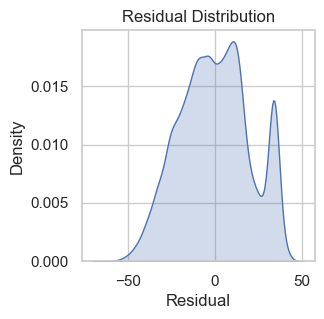

In [106]:
plt.figure(figsize = (3,3), dpi = 100)
sns.kdeplot(residual_matrix['Residuals'], fill = True)
plt.xlabel('Residual')
plt.title('Residual Distribution')
plt.show()

Distribution of **Residuals** is **NOT NORMAL**. We will **avoid Linear Regression**.

### 5 - Fold Cross Validation Modeling

In [78]:
def cv_score(ml_model, cols = drop_cols):
    i = 1
    rmse_score = []
    X = x[cols]
    
    kf = KFold(n_splits = 5, random_state = 42, shuffle = True)
    
    for train_index, test_index in kf.split(X):
        xtr, xval = X.loc[train_index], X.loc[test_index]
        ytr, yval = y.loc[train_index], y.loc[test_index]
        
        model = ml_model
        model.fit(xtr, ytr)
        pred_value = model.predict(xval)
        
        mse = MSE(pred_value, yval)
        rmse = np.sqrt(mse)
        print('\n for {} of KFold{}, RMSE Score is:  {}'.format(i, kf.n_splits, rmse))
        
        rmse_score.append(rmse)
        i+=1
        
    return rmse_score

**1. Decision Tree: Without Validation**

In [80]:
tree_model = DecisionTreeRegressor(min_samples_leaf = 25, min_samples_split = 25)

In [81]:
xtr, xtest, ytr, ytest = train_test_split(x,y, random_state = 423)

In [82]:
tree_model.fit(xtr, ytr)

train_preds = tree_model.predict(xtr)
test_preds = tree_model.predict(xtest)

train_mse = MSE(train_preds, ytr)
test_mse = MSE(test_preds, ytest)

np.sqrt(train_mse), np.sqrt(test_mse)

(14.413361515372618, 17.006084275744765)

**3. Cross Validated Decision Tree**

In [83]:
cv_dt = cv_score(tree_model, cols = x.columns)
cv_dt


 for 1 of KFold5, RMSE Score is:  16.686022954444653

 for 2 of KFold5, RMSE Score is:  16.82379644417747

 for 3 of KFold5, RMSE Score is:  16.782868454362802

 for 4 of KFold5, RMSE Score is:  16.664971232217862

 for 5 of KFold5, RMSE Score is:  16.975262120557854


[16.686022954444653,
 16.82379644417747,
 16.782868454362802,
 16.664971232217862,
 16.975262120557854]

## Selecting Top-10 Features for prediction

**1. Top-10 Features for Decision Tree**

In [89]:
from sklearn.feature_selection import RFE

model = tree_model
rfe = RFE(estimator = model, n_features_to_select = 1, step = 1)
rfe.fit(x,y)

RFE(estimator=DecisionTreeRegressor(min_samples_leaf=25, min_samples_split=25),
    n_features_to_select=1)

In [90]:
ranking_df = pd.DataFrame()
ranking_df['Feature'] = x.columns
ranking_df['Rank'] = rfe.ranking_

In [91]:
ranked = ranking_df.sort_values(by = 'Rank')
ranked

,Feature,Rank
14,genre,1
13,artist,2
7,acousticness,3
12,duration,4
4,energy,5
8,instrumentalness,6
5,loudness,7
3,danceability,8
10,valence,9
11,tempo,10


In [92]:
ranked['Feature'][:10].values

array(['genre', 'artist', 'acousticness', 'duration', 'energy',
       'instrumentalness', 'loudness', 'danceability', 'valence', 'tempo'],
      dtype=object)

In [93]:
cv_dt_top10 = cv_score(tree_model, cols = ranked['Feature'][:10].values)
cv_dt_top10


 for 1 of KFold5, RMSE Score is:  16.594627443667473

 for 2 of KFold5, RMSE Score is:  16.585429758596856

 for 3 of KFold5, RMSE Score is:  16.708573949507944

 for 4 of KFold5, RMSE Score is:  16.560467141510813

 for 5 of KFold5, RMSE Score is:  16.85896875416643


[16.594627443667473,
 16.585429758596856,
 16.708573949507944,
 16.560467141510813,
 16.85896875416643]

## Comparison

In [104]:
score_matrix = pd.DataFrame({'decision': cv_dt, 'decision10': cv_dt_top10})
score_matrix

,decision,decision10
0,16.686023,16.594627
1,16.823796,16.585430
2,16.782868,16.708574
3,16.664971,16.560467
4,16.975262,16.858969


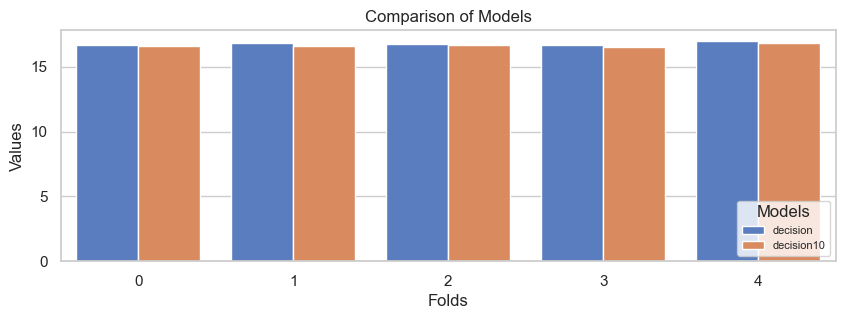

In [107]:
score_matrix_melted = score_matrix.reset_index().melt(id_vars='index', var_name='Model', value_name='Value')

# Set the style for the plot
sns.set(style='whitegrid')

# Create the bar plot
plt.figure(figsize=(10, 3), dpi = 100)
sns.barplot(data=score_matrix_melted, x='index', y='Value', hue='Model', palette='muted')
plt.xlabel('Folds')
plt.ylabel('Values')
plt.title('Comparison of Models')
plt.legend(title='Models', loc='lower right', fontsize = 8)
plt.show()